In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step


In [3]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=0)

In [4]:
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')
X_valid = X_valid.astype('float32')

X_train = X_train/255.0
X_valid = X_valid/255.0
X_test = X_test/255.0

In [5]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

model = load_model('/content/cifar10_hyper-tuned.h5')

optimizer = Adam(learning_rate= 0.001)

In [8]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 128)    │          3,584 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_6     │ (None, 32, 32, 128)    │            512 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 32)     │         36,896 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_7     │ (None, 32, 32, 32)     │            128 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 32)     │          9,248 │ batch_normalization_7… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_8     │ (None, 32, 32, 32)     │            128 │ conv2d_9[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 32)     │          4,128 │ batch_normalization_6… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_2 (Add)               │ (None, 32, 32, 32)     │              0 │ batch_normalization_8… │
│                           │                        │                │ conv2d_10[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ re_lu_2 (ReLU)            │ (None, 32, 32, 32)     │              0 │ add_2[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_11 (Conv2D)        │ (None, 16, 16, 128)    │         36,992 │ re_lu_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_9     │ (None, 16, 16, 128)    │            512 │ conv2d_11[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_12 (Conv2D)        │ (None, 16, 16, 128)    │        147,584 │ batch_normalization_9… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_10    │ (None, 16, 16, 128)    │            512 │ conv2d_12[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_13 (Conv2D)        │ (None, 16, 16, 128)    │        147,584 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_11    │ (None, 16, 16, 128)    │            512 │ conv2d_13[0][0]        │
│ (BatchNormalization) 

 Total params: 685,804 (2.62 MB)

 Trainable params: 684,138 (2.61 MB)

 Non-trainable params: 1,664 (6.50 KB)

 Optimizer params: 2 (12.00 B)

In [9]:
model.compile(optimizer= optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [11]:
model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs = 50,
    validation_data = (X_valid, y_valid),
    callbacks=[stop_early]
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 65s 73ms/step - accuracy: 0.8031 - loss: 0.6264 - val_accuracy: 0.8052 - val_loss: 0.6454
Epoch 2/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 52ms/step - accuracy: 0.8260 - loss: 0.5308 - val_accuracy: 0.8246 - val_loss: 0.5434
Epoch 3/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.8356 - loss: 0.4848 - val_accuracy: 0.8310 - val_loss: 0.5041
Epoch 4/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8389 - loss: 0.4800 - val_accuracy: 0.8292 - val_loss: 0.5281
Epoch 5/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8492 - loss: 0.4473 - val_accuracy: 0.8266 - val_loss: 0.5597
Epoch 6/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 39s 51ms/step - accuracy: 0.8533 - loss: 0.4349 - val_accuracy: 0.8378 - val_loss: 0.4884
Epoch 7/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 38s 53ms/step - accuracy: 0.8586 - loss: 0.4137 - val_accuracy: 0.8288 - val_loss: 0.5246
Epoch 8/50
704/704 ━━━━━━━━━━━━━━━━━━━━ 40s 53ms/step - accuracy: 0.8592 - loss: 0.4191 - val_accurac

In [12]:
model.save('/content/drive/MyDrive/cifar10_models/cifar10_augmented.h5')

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict probabilities for the test set
y_pred = model.predict(X_test)

# Convert probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure y_true is in the correct shape (integer labels, not one-hot encoded)
y_true = np.argmax(y_test, axis=1) if y_test.ndim > 1 else y_test.flatten()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


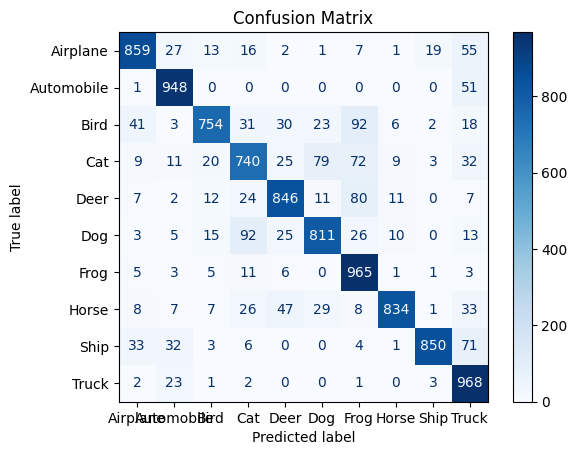

              precision    recall  f1-score   support

    Airplane       0.89      0.86      0.87      1000
  Automobile       0.89      0.95      0.92      1000
        Bird       0.91      0.75      0.82      1000
         Cat       0.78      0.74      0.76      1000
        Deer       0.86      0.85      0.85      1000
         Dog       0.85      0.81      0.83      1000
        Frog       0.77      0.96      0.86      1000
       Horse       0.96      0.83      0.89      1000
        Ship       0.97      0.85      0.90      1000
       Truck       0.77      0.97      0.86      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [14]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Define class labels (modify these according to your dataset)
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=labels))